In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({
    'axes.titlesize': 12,       
    'axes.labelsize': 10,       
    'xtick.labelsize': 10,      
    'ytick.labelsize': 10,      
    'legend.fontsize': 12,      
    'figure.titlesize': 16      
})

In [4]:
# for cumulative MAF
def calculate_cmaf(group, total_chromosomes=20000,scale=1):
    prob_product = np.prod((1 - group['OBS_N'] / total_chromosomes) ** (group['COUNT_SITES']/scale))
    return 1 - prob_product


In [5]:
# params
scale_factor = 3924.065

In [6]:
import os
os.chdir('../empirical/subsampling_SIR_vF/notebooks/')

0
synonymous
[1.0511973340570726, 1.454834888480865, 1.5916318069824704, 1.6363388475980905, 2.012377470811518, 2.090459765574729, 2.3040647899563336, 2.545523583324945]
38.39788604352356
142.15468407825517
1
synonymous
[0.555444417969631, 0.9629045390430587, 1.110922814309481, 1.1629267099296265, 1.164073479924517, 1.1211842821156122, 1.2468193060002828, 1.4328253991715223]
73.35749678840156
157.96017617911542
2
synonymous
[0.019479782849478783, 0.013869189192989071, 0.012645129720901658, 0.01223253263014847, 0.010456487788737218, 0.010404080742047333, 0.009985853748868309, 0.009523565665788441]
-28.802136552768776
-51.1105142219629
3
synonymous
[0.001449312503851605, 0.001452399765822395, 0.001452924262032415, 0.001452064152338695, 0.0015265069328896284, 0.0015778227029025697, 0.0016691075984470328, 0.0017586579774449991]
0.21301561689320284
21.344290673770928
0
missense
[0.8834546148785337, 1.2596546353505016, 1.3850093376808659, 1.442305364462617, 1.6039489661868493, 1.640645606023

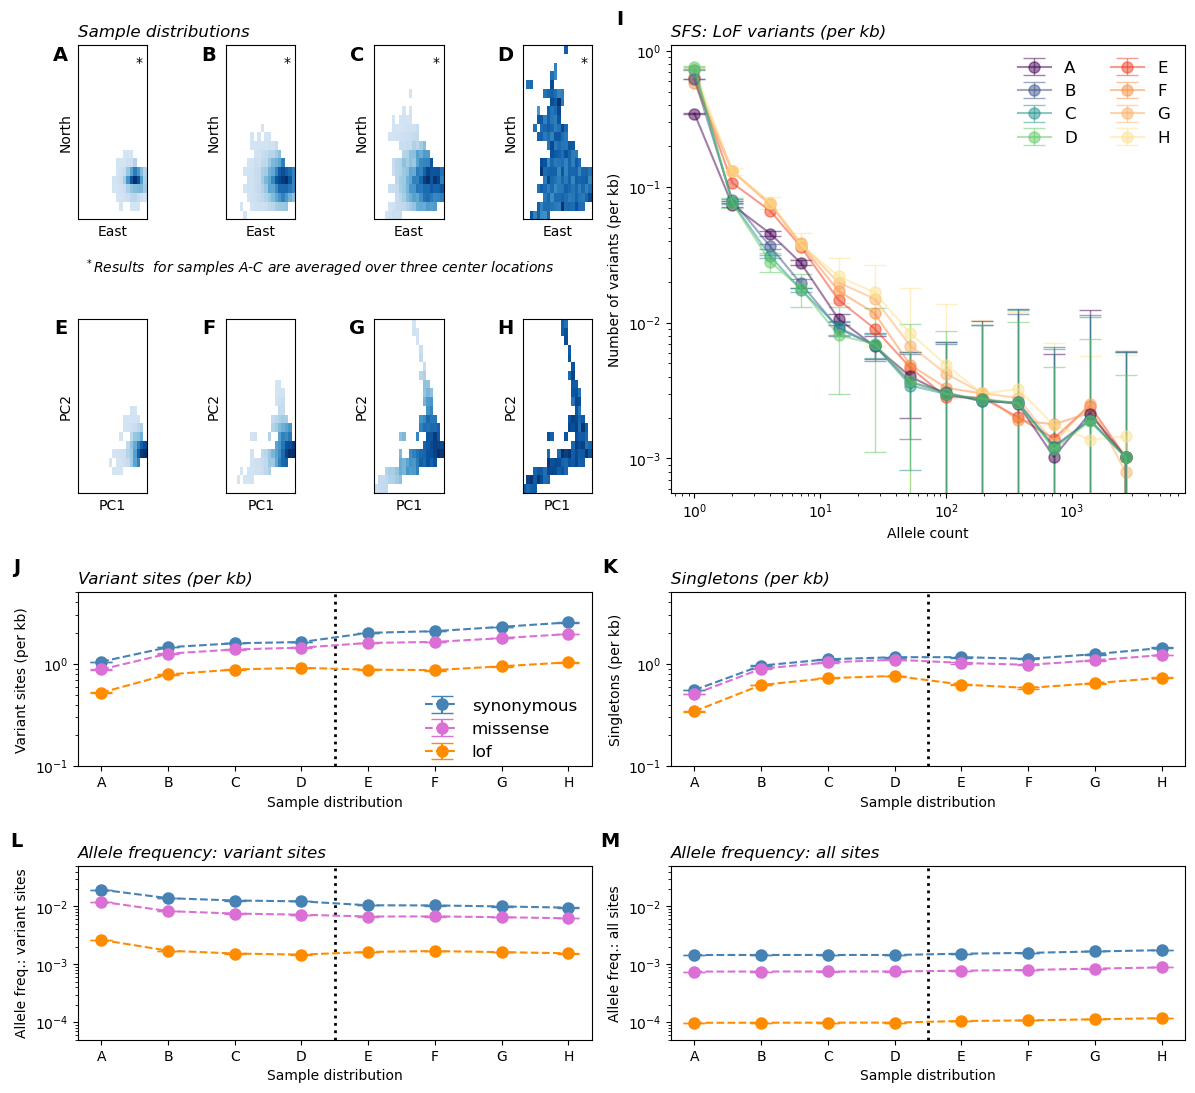

In [39]:
fig = plt.figure(figsize=(12, 11)) 
gs = gridspec.GridSpec(4, 8, figure=fig)
axes = {}

### PLOT SETUP ###
for i in range(8):
    if i<4:
        ax = fig.add_subplot(gs[0, i])  
        ax.set_xticks([])
        ax.set_yticks([])
        axes[f'square_{i + 1}'] = ax  
        ax.text(-0.25, 1, chr(65 + i), fontsize=14, weight='bold', 
                ha='center', va='top', transform=ax.transAxes)
        ax.set_xlabel('East')
        ax.set_ylabel('North')
        ax.text(0.95,0.95,r'$*$',transform = ax.transAxes,ha='right',va='top',fontsize=10)
        
    else:
        ax = fig.add_subplot(gs[1, i-4])  
        ax.set_xticks([])
        ax.set_yticks([])
        axes[f'square_{i + 1}'] = ax  
        ax.text(-0.25, 1, chr(65 + i), fontsize=14, weight='bold', 
                ha='center', va='top', transform=ax.transAxes)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
    if i==0:
        ax.set_title('Sample distributions',fontstyle='italic',loc='left')

axes['wide_panel_1'] = fig.add_subplot(gs[0:2, 4:])  # 
axes['wide_panel_1'].set_xticks([])
axes['wide_panel_1'].set_yticks([])

axes['panel2'] = fig.add_subplot(gs[2,0:4])
axes['panel3'] = fig.add_subplot(gs[2,4:])
axes['panel4'] = fig.add_subplot(gs[3,0:4])
axes['panel5'] = fig.add_subplot(gs[3,4:])
# axes['panel6'] = fig.add_subplot(gs[4, 0:4])

#### HEATMAPS ####

df = pd.read_csv('../metadata/metadata_cleaned_wes.csv')
## geo ##
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere'] != 'Elsewhere') & (df['used_in_pca'] == 1) & (df['within_1epsilon_pca'] == True)]
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)
w_list = ['50000', '100000', '150000']
centers = ['centerE16N4', 'centerE9N9', 'centerE6N4']
c = centers[0]
for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../results/ids/chr1_synonymous_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples', delimiter=' ', header=None)
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_geo, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+1}'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../results/ids/chr1_synonymous_uniformgeo_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_4'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

## pca ##
df_pca = df[(df['used_in_pca'] == 1)]
w_list = [0.0015, 0.0025, 0.005]
centers = ['centerX19Y4', 'centerX0Y0', 'centerX12Y19'] 
c = centers[0]
x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)

for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../results/ids/chr1_synonymous_{c}pca{w}_nSIR10000_nSIRreps10.SIRexamples', header=None, sep=' ')
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_pca, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+5}'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../results/ids/chr1_synonymous_uniformpca_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_pca, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_8'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

###### SFS ######
vartypes=['lof']
colors = ['#440154',  
          '#3b528b',  
          '#21918c',  
          '#5ec962',  
          '#f03b20',  
          '#fd8d3c',  
          '#fdae61',  
          '#fee08b']  

## pca ##
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']
nbins=15
for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor
    
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)    

        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)

        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_pca[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j+4])

    axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_pca[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[7])

## geo ##

centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000', '100000', '150000']
labs_geo = ['A','B','C','D']
nbins=15

for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor
    
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
    
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_geo[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j])

    axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_geo[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])

handles, labels = axes['wide_panel_1'].get_legend_handles_labels()
order = [4,5,6,7,0,1,2,3]  
axes['wide_panel_1'].legend([handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=2,frameon=False)
axes['wide_panel_1'].set_yscale('log')
axes['wide_panel_1'].set_xscale('log')
axes['wide_panel_1'].set_title('SFS: LoF variants (per kb)',loc='left',fontstyle='italic')

axes['wide_panel_1'].text(-0.1, 1.08, 'I', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['wide_panel_1'].transAxes)
axes['wide_panel_1'].set_ylabel('Number of variants (per kb)')
axes['wide_panel_1'].set_xlabel('Allele count')

### SUM STATS ###

w_list = ['50000', '100000', '150000']
centers = ['centerE16N4', 'centerE9N9', 'centerE6N4']
w_list_pca = ['0.0015','0.0025','0.005']
center_pca='centerX19Y4'
vartypes = ['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
lt=['-','dotted','--']
labels = ['A','B','C','D','E','F','G','H']
reps=np.arange(10)+1
n=10000
for i,vt in enumerate(vartypes):
    for row in [0,1,2,3]:
        means = []
        errors = []
    
        for idx, w in enumerate(w_list + ['uniform']+w_list_pca+['uniformpca']):
            all_means = []
            all_errors = []
    
            if w in w_list+['uniform']:
                for center in centers:  # Loop through each center
                    sfs_file = f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs' if w != 'uniform' else f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs'
                    sfs = pd.read_csv(sfs_file, delimiter=' ')
            
                    if row == 0:
                        # Row 1: Sum of Segregating Sites (excluding OBS_N=0)
                        segregating_sites = [
                            sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] > 0)]['COUNT_SITES'].sum()/scale_factor
                            for rep in reps
                        ]
                        current_mean = np.mean(segregating_sites)
                        all_means.append(current_mean)
                        all_errors.append(np.std(segregating_sites))
            
                    elif row == 1:
                        # Row 2: Number of Singletons (OBS_N=1)
                        singletons = [
                            sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] == 1)]['COUNT_SITES'].sum()/scale_factor
                            for rep in reps
                        ]
                        current_mean = np.mean(singletons)
                        all_means.append(current_mean)
                        all_errors.append(np.std(singletons))
            
                    elif row == 2:
                        # Row 3: Average Counts of Segregating Alleles (OBS_N > 0)
                        total_count_contributions = []
                        for rep in reps:
                            contributions = sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] > 0)]
                            total_contribution = (contributions['OBS_N'] * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                            total_count_contributions.append(total_contribution/n)
            
                        current_mean = np.mean(total_count_contributions)
                        all_means.append(current_mean)
                        all_errors.append(np.std(total_count_contributions))
            
                    elif row == 3:
                        # Row 4: Average Frequency 
                        frequency_contributions = []
                        for rep in reps:
                            contributions = sfs[(sfs['SIR_REP'] == rep)]
                            
                            # Calculate allele frequency p
                            p = contributions['OBS_N'] / n
                            
                            # Weighted average of allele frequency
                            weighted_frequency = (p * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                            frequency_contributions.append(weighted_frequency)
                    
                        current_mean = np.mean(frequency_contributions)
                        all_means.append(current_mean)
                        all_errors.append(np.std(frequency_contributions))  

                    elif row==4:
                        total_chromosomes=20000
                        sfs = sfs[sfs['OBS_N'] > 0]
                        all_cmaf = []  
                        for rep in reps:  
                            rep_data = sfs[sfs['SIR_REP'] == rep]  
                            cmaf = calculate_cmaf(rep_data,scale=scale_factor)  # Calculate cumulative prob for the subset
                            all_cmaf.append(cmaf)  
                    
                        all_means.append(np.mean(all_cmaf))
                        all_errors.append(np.std(all_cmaf))
                        
                # Average over all centers for this weight type
                means.append(np.mean(all_means))
                errors.append(np.sqrt(np.sum(np.array(all_errors) ** 2)) / len(all_errors))  # Combine standard errors
            else:
                sfs_file = f'../results/sfs/chr1_{vt}_{center_pca}pca{w}_nSIR10000_nSIRreps10.SIRsfs' if w != 'uniformpca' else f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs'
                sfs = pd.read_csv(sfs_file, delimiter=' ')
        
                if row == 0:
                    # Row 1: Sum of Segregating Sites (excluding OBS_N=0)
                    segregating_sites = [
                        sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] > 0)]['COUNT_SITES'].sum()/scale_factor
                        for rep in reps
                    ]
                    current_mean = np.mean(segregating_sites)
                    all_means.append(current_mean)
                    all_errors.append(np.std(segregating_sites))
        
                elif row == 1:
                    # Row 2: Number of Singletons (OBS_N=1)
                    singletons = [
                        sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] == 1)]['COUNT_SITES'].sum()/scale_factor
                        for rep in reps
                    ]
                    current_mean = np.mean(singletons)
                    all_means.append(current_mean)
                    all_errors.append(np.std(singletons))
        
                elif row == 2:
                    # Row 3: Average Freq of Segregating Alleles (OBS_N > 0)
                    total_count_contributions = []
                    for rep in reps:
                        contributions = sfs[(sfs['SIR_REP'] == rep) & (sfs['OBS_N'] > 0)]
                        total_contribution = ((contributions['OBS_N'] * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum())
                        total_count_contributions.append(total_contribution/n)
        
                    current_mean = np.mean(total_count_contributions)
                    all_means.append(current_mean)
                    all_errors.append(np.std(total_count_contributions))
        
                elif row == 3:
                    # Row 4: Average Frequency 
                    frequency_contributions = []
                    for rep in reps:
                        contributions = sfs[(sfs['SIR_REP'] == rep)]
                        
                        # Calculate allele frequency p
                        p = contributions['OBS_N'] / n
                        
                        # Weighted average of allele frequency
                        weighted_frequency = (p * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                        frequency_contributions.append(weighted_frequency)
                
                    current_mean = np.mean(frequency_contributions)
                    all_means.append(current_mean)
                    all_errors.append(np.std(frequency_contributions))      
                elif row==4:
                    total_chromosomes = 20000
                    sfs = sfs[sfs['OBS_N'] > 0]  # Filter rows where OBS_N > 0
                    all_cmaf = []  
                    for rep in reps:  
                        rep_data = sfs[sfs['SIR_REP'] == rep]  
                        cmaf = calculate_cmaf(rep_data,scale=scale_factor)  # Calculate cumulative prob for the subset
                        all_cmaf.append(cmaf)  
                    
                    all_means.append(np.mean(all_cmaf))
                    all_errors.append(np.std(all_cmaf))
                        
                # Average over all centers for this weight type
                means.append(np.mean(all_means))
                errors.append(np.sqrt(np.sum(np.array(all_errors) ** 2)) / len(all_errors))  # Combine standard errors
        print(row)
        print(vt)
        print(means)
        print(((means[1]-means[0])/(means[0]))*100)
        print(((means[-1]-means[0])/(means[0]))*100)

        if row==0:
            axes['panel2'].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)
        if row==1:
            axes['panel3'].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)
        if row==2:
            axes['panel4'].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)
        if row==3:
            axes['panel5'].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)
        # if row==4:
            # axes['panel6'].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)
            
    
axes['panel2'].set_yscale('log')
axes['panel3'].set_yscale('log')
axes['panel4'].set_yscale('log')
axes['panel5'].set_yscale('log')
# axes['panel6'].set_yscale('log')

axes['panel2'].set_ylim(1e-1,5e0)
axes['panel3'].set_ylim(1e-1,5e0)
axes['panel4'].set_ylim(5e-5,5e-2)
axes['panel5'].set_ylim(5e-5,5e-2)
# axes['panel6'].set_ylim(5e-4,2e-2)


axes['panel2'].set_ylabel('Variant sites (per kb)')
axes['panel3'].set_ylabel('Singletons (per kb)')
axes['panel4'].set_ylabel('Allele freq.: variant sites')
axes['panel5'].set_ylabel('Allele freq.: all sites')
# axes['panel6'].set_ylabel('Cumulative MAF (per kb)')

axes['panel2'].set_title('Variant sites (per kb)',loc='left',fontstyle='italic')
axes['panel3'].set_title('Singletons (per kb)',loc='left',fontstyle='italic')
axes['panel4'].set_title('Allele frequency: variant sites',loc='left',fontstyle='italic')
axes['panel5'].set_title('Allele frequency: all sites',loc='left',fontstyle='italic')
# axes['panel6'].set_title('Cumulative MAF (per kb)',loc='left',fontstyle='italic')


axes['panel2'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel3'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel4'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel5'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
# axes['panel6'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)

axes['panel2'].legend(loc='lower right',frameon=False, bbox_to_anchor=(1, -0.05))

axes['panel2'].set_xlabel('Sample distribution')
axes['panel3'].set_xlabel('Sample distribution')
axes['panel4'].set_xlabel('Sample distribution')
axes['panel5'].set_xlabel('Sample distribution')
# axes['panel6'].set_xlabel('Sample distribution')

axes['panel2'].text(-0.12, 1.2, 'J', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['panel2'].transAxes)
axes['panel3'].text(-0.12, 1.2, 'K', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['panel3'].transAxes)
axes['panel4'].text(-0.12, 1.2, 'L', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['panel4'].transAxes)
axes['panel5'].text(-0.12, 1.2, 'M', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['panel5'].transAxes)
# axes['panel6'].text(-0.12, 1.2, 'N', fontsize=14, weight='bold', 
#                           ha='center', va='top', transform=axes['panel6'].transAxes)

fig.text(0.07,0.75,r'$^*$Results  for samples A-C are averaged over three center locations',ha='left',fontsize=10,fontstyle='italic')

plt.tight_layout()
plt.savefig('ukb_maintextfig_v20241122.pdf')
plt.show()


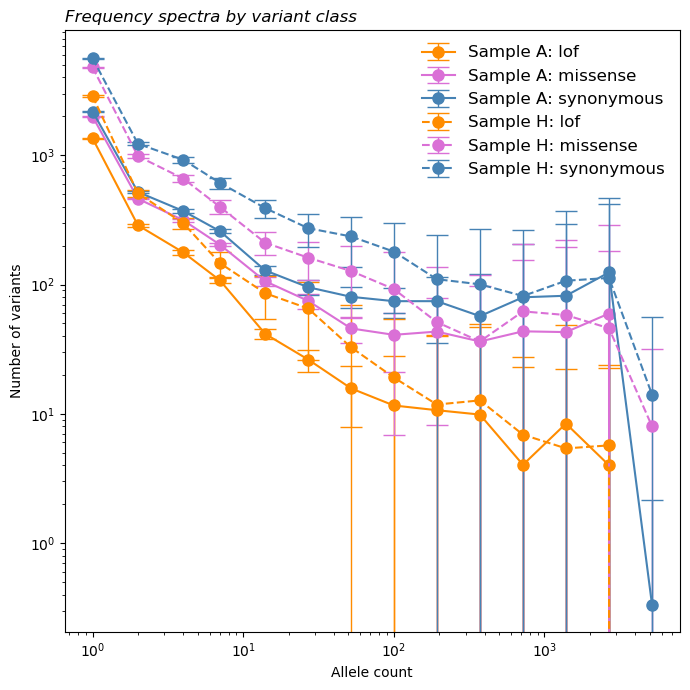

In [8]:
fig,ax = plt.subplots(1,1,figsize=(7, 7)) 
ls=['-','--']
###### SFS ######
# Gaussian
colors = ['#440154',  # Dark Purple (Viridis)
          '#3b528b',  # Blue (Viridis)
          '#21918c',  # Teal (Viridis)
          '#5ec962',  # Green (Viridis)
          '#f03b20',  # Red (Warm)
          '#fd8d3c',  # Orange (Warm)
          '#fdae61',  # Light Orange (Warm)
          '#fee08b']  # Light Yellow (Warm)
vartypes=['lof','missense','synonymous']
centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000']#, '100000', '150000']
labs_geo = ['A','B','C','D']
nbins=15
colors=['darkorange','orchid','steelblue']
for i, vt in enumerate(vartypes):
    # Gaussian data plotting
    for j, w in enumerate(w_list):
        
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']
            sfs_std = sfs_avg_grouped['std']
    
            # Collect averages and standard deviations for all centers
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        # Convert lists of series into a DataFrame
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
    
        # Calculate the mean and std across centers
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        # Binning for Gaussian data for all values
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        # Plot combined data for Gaussian with error bars
        ax.errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=f'Sample A: {vt}',
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=1,color=colors[i])

   
# PCA
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']

for i, vt in enumerate(vartypes):
    # Load uniform data
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']
    sfs_unif_std = sfs_unif_grouped['std']
    
    # Binning for uniform data for all values
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)
    # Combine Uniform data plotting
    ax.errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='--',
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=1, label=f'Sample H: {vt}',color=colors[i])

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='upper right',frameon=False)

ax.set_xlabel("Allele count")
ax.set_ylabel("Number of variants")
ax.set_title("Frequency spectra by variant class",loc="left",fontstyle="italic")

plt.tight_layout()

plt.savefig('sfs_varclass.pdf')


In [9]:
# function to map to bin
def map_to_bin(x,y,xedges,yedges):
    return [np.digitize(x,xedges)-1,np.digitize(y,yedges)-1]

# function to get bin center
def get_bin_center(bin_idx,xedges,yedges):
    x_idx, y_idx = bin_idx
    center_x = (xedges[x_idx] + xedges[x_idx + 1]) / 2
    center_y = (yedges[y_idx] + yedges[y_idx + 1]) / 2
    return [center_x, center_y]

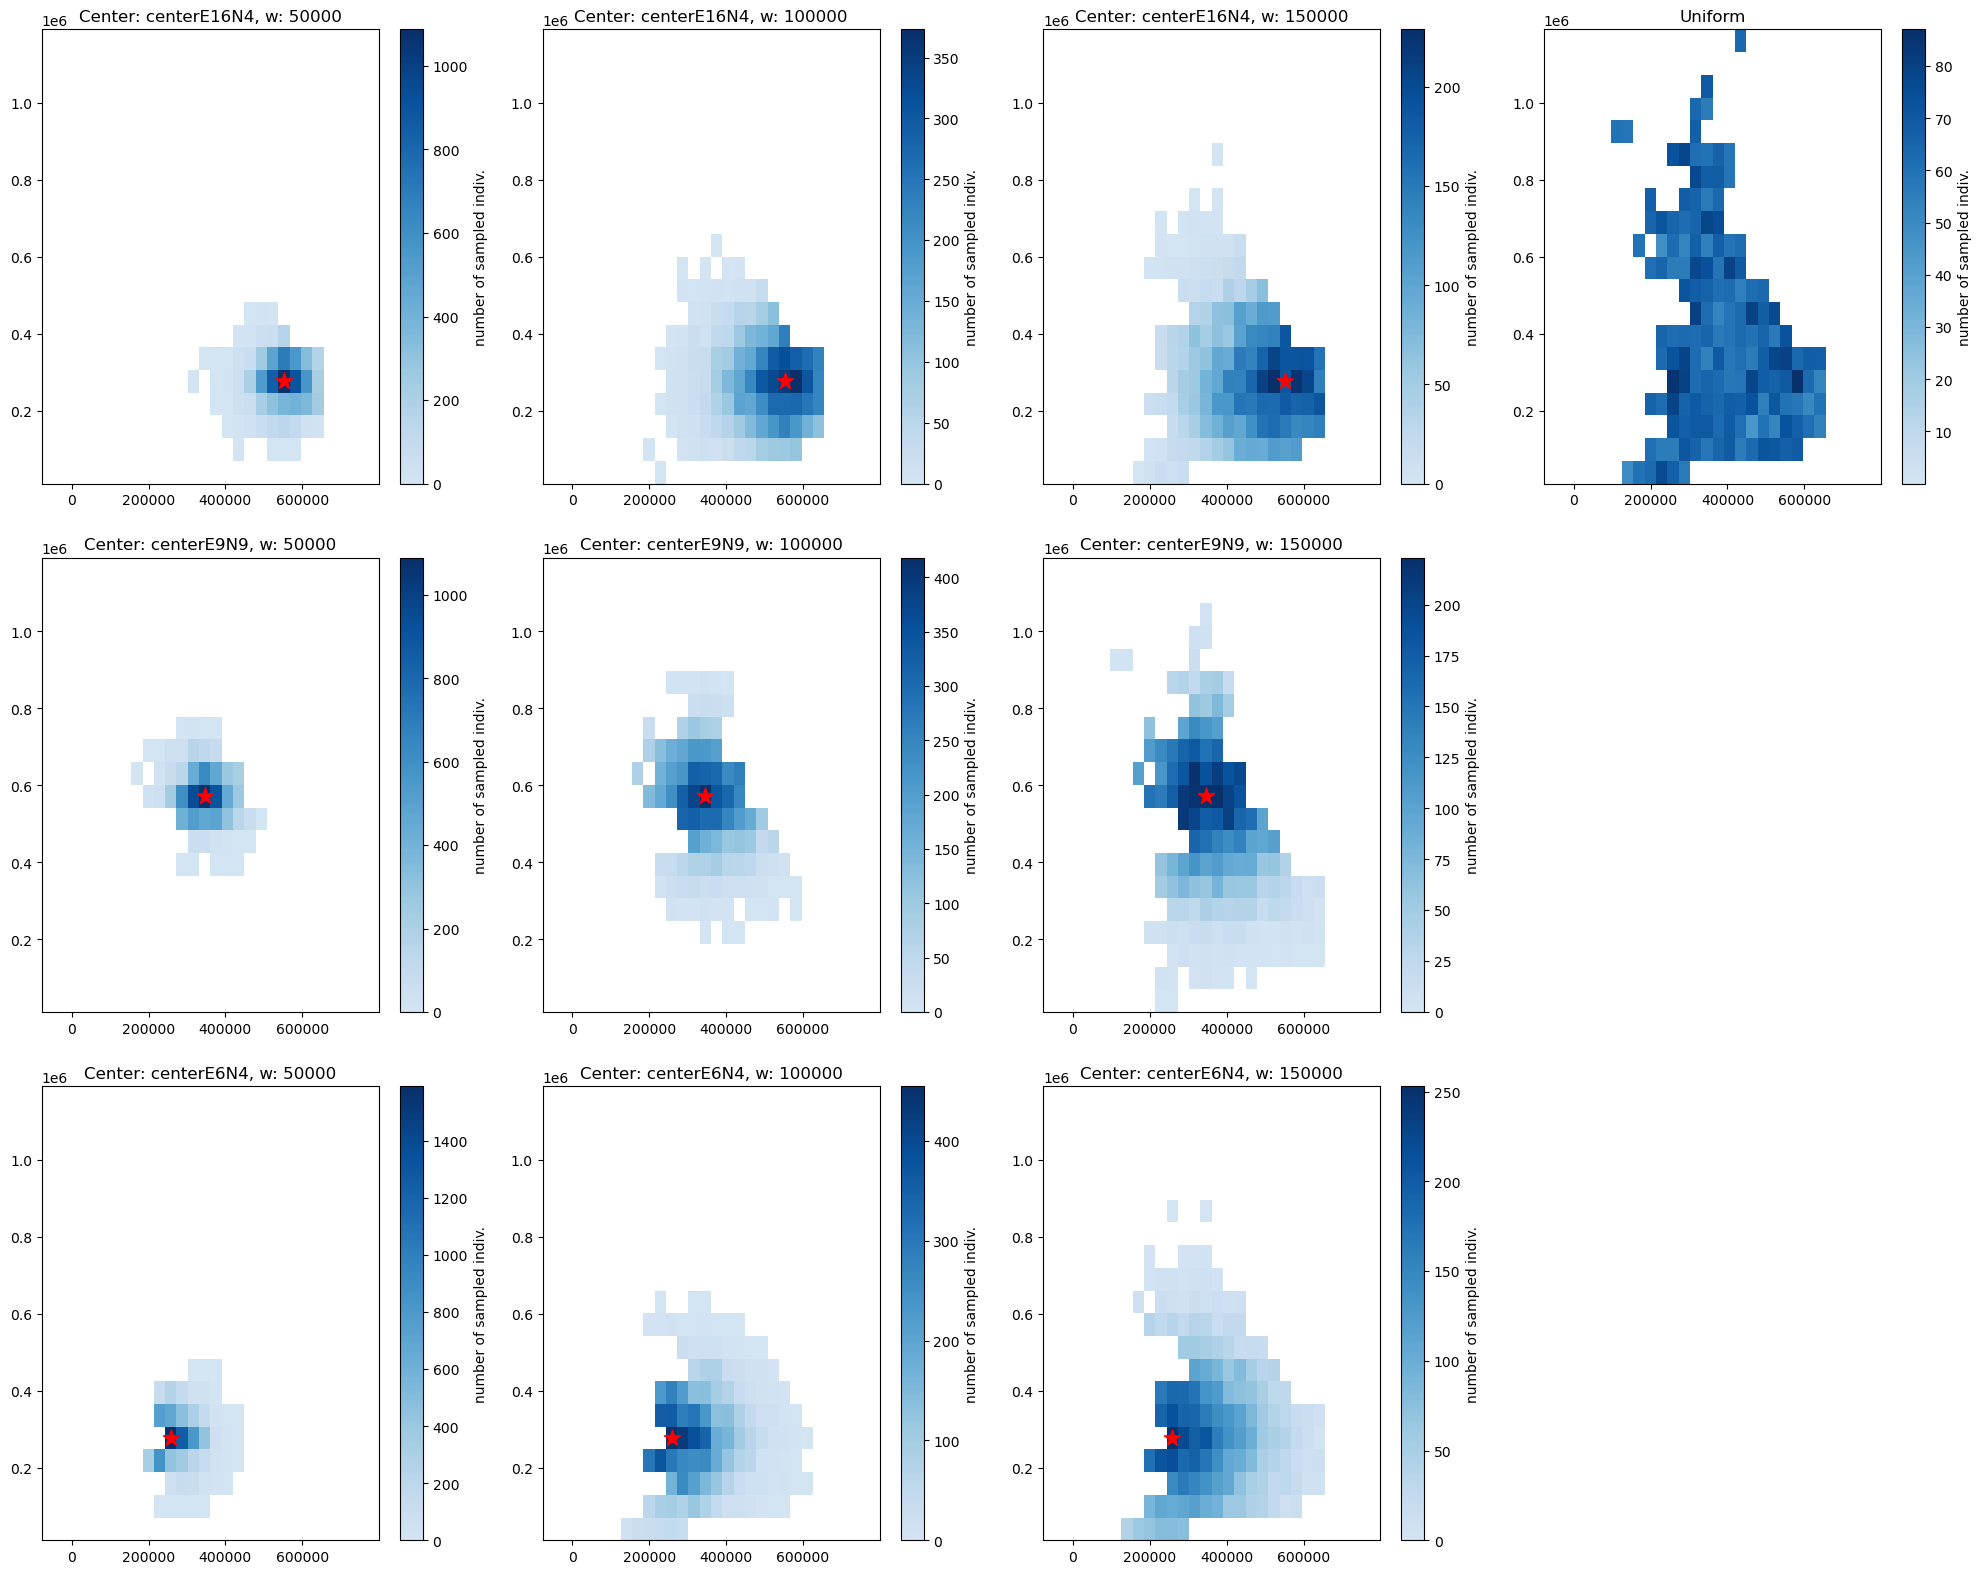

In [10]:
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
reps = [0]#np.arange(10)

center_bin_1 = [16,4]
center_bin_2 = [9,9]
center_bin_3 = [6,4]
center_coord_1 = get_bin_center(center_bin_1,xedges,yedges)
center_coord_2 = get_bin_center(center_bin_2,xedges,yedges)
center_coord_3 = get_bin_center(center_bin_3,xedges,yedges)

w_list = ['50000','100000','150000']
centers = ['centerE16N4','centerE9N9','centerE6N4']
vartypes = ['lof']

for vt in vartypes:
    for rep in reps:
        fig,ax=plt.subplots(3,4,figsize=(20,16))
    
        idlist_unif = pd.read_csv(f'../results/ids/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRexamples',sep = ' ', header=None)
        ids_unif = idlist_unif[idlist_unif[1]==rep]
        ids_unif.rename(columns={2: 'id'}, inplace=True)
        temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
        # temp = temp.drop_duplicates()
        hist_temp = ax[0,3].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
        ax[0,3].axis('equal')
        ax[0,3].set_title('Uniform')
        cbar = fig.colorbar(hist_temp[3], ax=ax[0,3], orientation='vertical',label='number of sampled indiv.')
    
        for i,c in enumerate(centers):
            for j,w in enumerate(w_list):
                idlist = pd.read_csv(f'../results/ids/chr1_{vt}_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples',delimiter=' ',header=None)
                ## subset by rep ## 
                ids = idlist[idlist[1]==rep]
                ids.rename(columns={2: 'id'}, inplace=True)
                temp = pd.merge(df_geo, ids, on=['id'], how='inner')
                
                hist_temp = ax[i,j].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
                ax[i,j].axis('equal')
                ax[i,j].set_title(f'Center: {c}, w: {w}')
                cbar = fig.colorbar(hist_temp[3], ax=ax[i,j], orientation='vertical',label='number of sampled indiv.')
                if c=='centerE16N4':
                    ax[i,j].scatter(center_coord_1[0],center_coord_1[1],s=150,marker="*",c='r')#,label='center bin 1')
                if c=='centerE9N9':
                    ax[i,j].scatter(center_coord_2[0],center_coord_2[1],s=150,marker="*",c='r')#,label='center bin 2')
                if c=='centerE6N4':
                    ax[i,j].scatter(center_coord_3[0],center_coord_3[1],s=150,marker="*",c='r')#,label='center bin 3')
    
        ax[1,3].axis('off')
        ax[2,3].axis('off')
        plt.tight_layout()
        # plt.show()
        plt.savefig('geo_locations.pdf')
        # plt.savefig(f'../plots_20241028/loc_dist/loc_dist_geo_chr1_{vt}_rep{rep}.png')


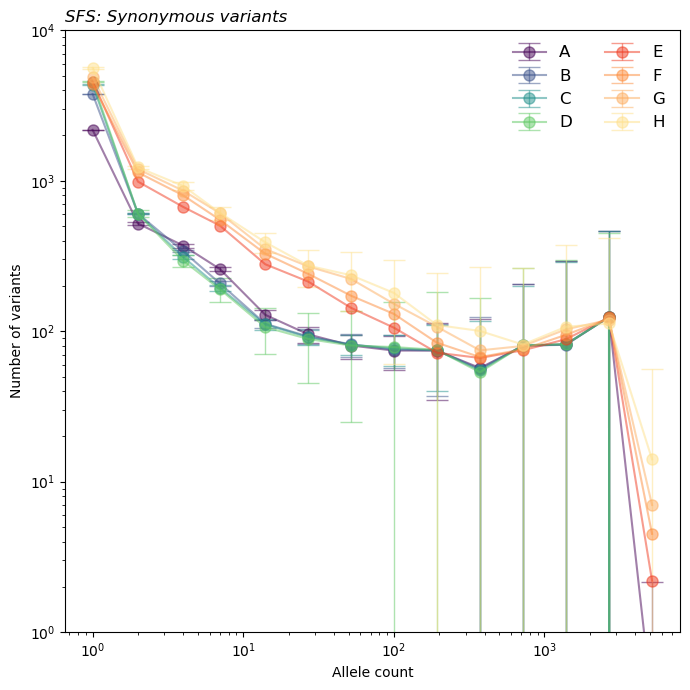

In [24]:
fig,ax = plt.subplots(1,1,figsize=(7, 7)) 

###### SFS ######
# Gaussian
colors = ['#440154',  # Dark Purple (Viridis)
          '#3b528b',  # Blue (Viridis)
          '#21918c',  # Teal (Viridis)
          '#5ec962',  # Green (Viridis)
          '#f03b20',  # Red (Warm)
          '#fd8d3c',  # Orange (Warm)
          '#fdae61',  # Light Orange (Warm)
          '#fee08b']  # Light Yellow (Warm)
vartypes=['synonymous']#,'synonymous']
centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000', '100000', '150000']
labs_geo = ['A','B','C','D']
nbins=15

for i, vt in enumerate(vartypes):
    # Load uniform data
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']
    sfs_unif_std = sfs_unif_grouped['std']
    
    # Create log bins starting from the minimum OBS_N value
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    # Binning for uniform data for all values
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    # Gaussian data plotting
    for j, w in enumerate(w_list):
        # Initialize lists to store combined data for all centers
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']
            sfs_std = sfs_avg_grouped['std']
    
            # Collect averages and standard deviations for all centers
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        # Convert lists of series into a DataFrame
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
    
        # Calculate the mean and std across centers
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        # Binning for Gaussian data for all values
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        # Plot combined data for Gaussian with error bars
        ax.errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_geo[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j])

    # Combine Uniform data plotting
    ax.errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_geo[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])

# PCA
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']

for i, vt in enumerate(vartypes):
    # Load uniform data
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']
    sfs_unif_std = sfs_unif_grouped['std']
    
    
    # Binning for uniform data for all values
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    # Gaussian data plotting
    for j, w in enumerate(w_list):
        # Initialize lists to store combined data for all centers
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']
            sfs_std = sfs_avg_grouped['std']
    
            # Collect averages and standard deviations for all centers
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        # Convert lists of series into a DataFrame
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)

         # Calculate the mean and std across centers
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        # Binning for Gaussian data for all values
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        # Plot combined data for Gaussian with error bars
        ax.errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_pca[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j+4])

    # Combine Uniform data plotting
    ax.errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_pca[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[7])
    
ax.legend(loc='upper right',ncol=2,frameon=False)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e0,1e4)
ax.set_title('SFS: Synonymous variants',loc='left',fontstyle='italic')
ax.set_xlabel("Allele count")
ax.set_ylabel("Number of variants")
plt.tight_layout()
# plt.show()
plt.savefig(f'sfs_synonymous.pdf')


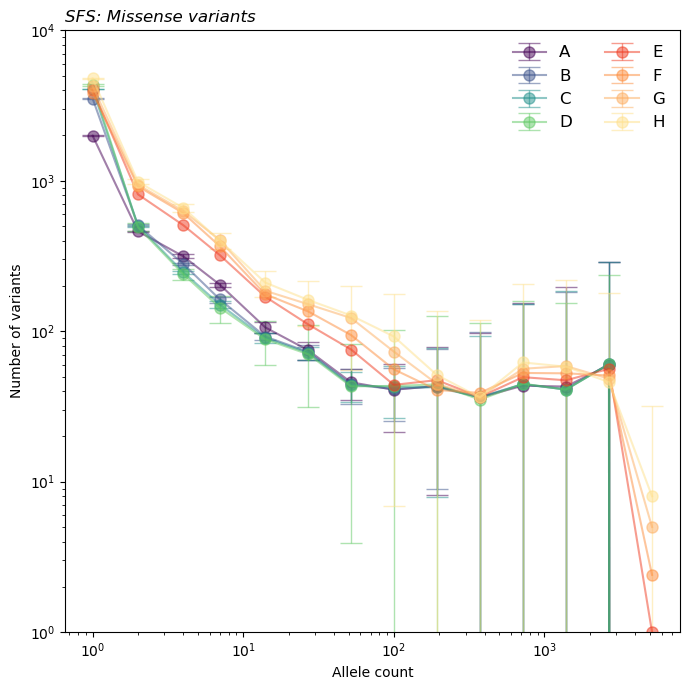

In [21]:
fig,ax = plt.subplots(1,1,figsize=(7, 7)) 

###### SFS ######
# Gaussian
colors = ['#440154',  # Dark Purple (Viridis)
          '#3b528b',  # Blue (Viridis)
          '#21918c',  # Teal (Viridis)
          '#5ec962',  # Green (Viridis)
          '#f03b20',  # Red (Warm)
          '#fd8d3c',  # Orange (Warm)
          '#fdae61',  # Light Orange (Warm)
          '#fee08b']  # Light Yellow (Warm)
vartypes=['missense']#,'synonymous']
centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000', '100000', '150000']
labs_geo = ['A','B','C','D']
nbins=15

for i, vt in enumerate(vartypes):
    # Load uniform data
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']
    sfs_unif_std = sfs_unif_grouped['std']
    
    # Create log bins starting from the minimum OBS_N value
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    # Binning for uniform data for all values
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    # Gaussian data plotting
    for j, w in enumerate(w_list):
        # Initialize lists to store combined data for all centers
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']
            sfs_std = sfs_avg_grouped['std']
    
            # Collect averages and standard deviations for all centers
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        # Convert lists of series into a DataFrame
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
    
        # Calculate the mean and std across centers
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        # Binning for Gaussian data for all values
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        # Plot combined data for Gaussian with error bars
        ax.errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_geo[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j])

    # Combine Uniform data plotting
    ax.errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_geo[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])

# PCA
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']

for i, vt in enumerate(vartypes):
    # Load uniform data
    sfs_unif = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']
    sfs_unif_std = sfs_unif_grouped['std']
    

    
    # Binning for uniform data for all values
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    # Gaussian data plotting
    for j, w in enumerate(w_list):
        # Initialize lists to store combined data for all centers
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']
            sfs_std = sfs_avg_grouped['std']
    
            # Collect averages and standard deviations for all centers
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)
    
        # Convert lists of series into a DataFrame
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)

         # Calculate the mean and std across centers
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        # Binning for Gaussian data for all values
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)

        # Plot combined data for Gaussian with error bars
        ax.errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_pca[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[j+4])

    # Combine Uniform data plotting
    ax.errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_pca[3],
                marker='o', capsize=8, markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[7])
    
ax.legend(loc='upper right',ncol=2,frameon=False)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e0,1e4)
ax.set_title('SFS: Missense variants',loc='left',fontstyle='italic')
ax.set_xlabel("Allele count")
ax.set_ylabel("Number of variants")
plt.tight_layout()
# plt.show()
plt.savefig(f'sfs_missense.pdf')


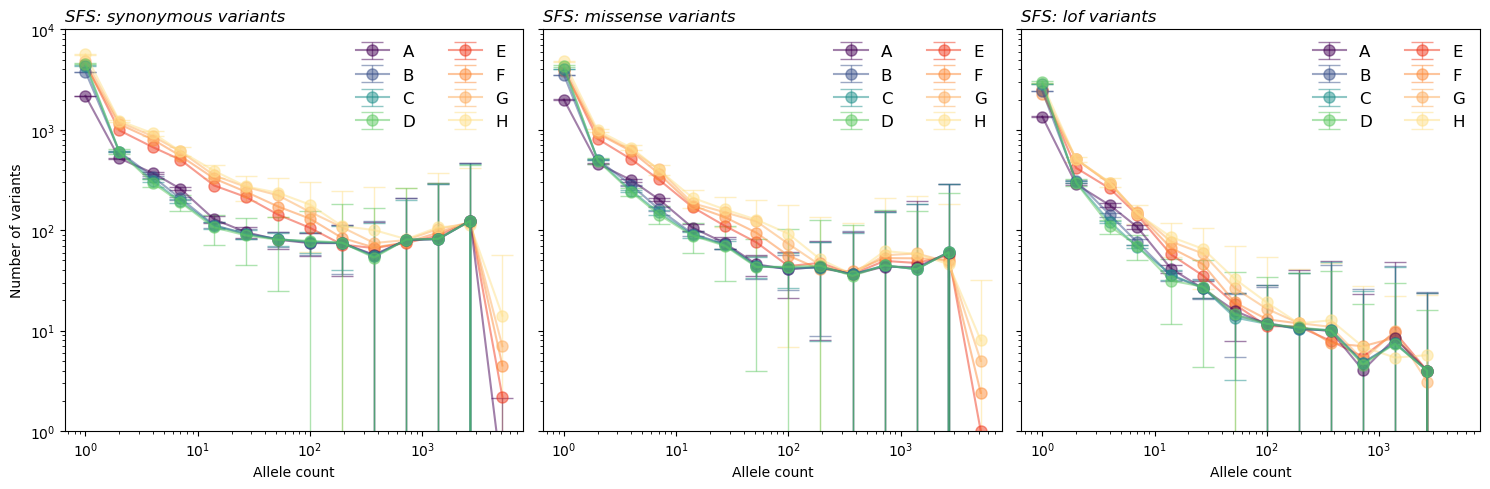

In [37]:

# Define plot parameters and styles
colors = ['#440154',  # Dark Purple (Viridis)
          '#3b528b',  # Blue (Viridis)
          '#21918c',  # Teal (Viridis)
          '#5ec962',  # Green (Viridis)
          '#f03b20',  # Red (Warm)
          '#fd8d3c',  # Orange (Warm)
          '#fdae61',  # Light Orange (Warm)
          '#fee08b']  # Light Yellow (Warm)

vartypes = ['synonymous', 'missense', 'lof']
centers_geo = ['centerE16N4', 'centerE9N9', 'centerE6N4']
w_list_geo = ['50000', '100000', '150000']
labs_geo = ['A', 'B', 'C', 'D']

centers_pca = ['centerX19Y4']
w_list_pca = [0.0015, 0.0025, 0.005]
labs_pca = ['E', 'F', 'G', 'H']

nbins = 15

# Create a 3-panel plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for k, vt in enumerate(vartypes):
    ax = axes[k]
    
    
    
    # Process PCA data
    sfs_unif_pca = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_pca_grouped = sfs_unif_pca.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_pca_avg = sfs_unif_pca_grouped['mean']
    sfs_unif_pca_std = sfs_unif_pca_grouped['std']
    
    sfs_unif_pca_binned, _ = np.histogram(sfs_unif_pca_avg.index, bins=log_bins, weights=sfs_unif_pca_avg.values)
    std_unif_pca_binned, _ = np.histogram(sfs_unif_pca_avg.index, bins=log_bins, weights=sfs_unif_pca_std.values)

   

    for j, w in enumerate(w_list_pca):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers_pca:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            all_sfs_avg.append(sfs_avg_grouped['mean'])
            all_sfs_std.append(sfs_avg_grouped['std'])
        
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, bins=log_bins, weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index, bins=log_bins, weights=sfs_std_final.values)

        ax.errorbar(log_bins[:-1], sfs_avg_binned, yerr=std_gaussian_binned, label=labs_pca[j], 
                    linestyle='-', marker='o', capsize=8, markersize=8, elinewidth=1, 
                    fmt='o', alpha=0.5, color=colors[j+4])
    ax.errorbar(log_bins[:-1], sfs_unif_pca_binned, yerr=std_unif_pca_binned, linestyle='-', 
                label=labs_pca[3], marker='o', capsize=8, markersize=8, elinewidth=1, 
                fmt='o', alpha=0.5, color=colors[7])

    # Load and process uniform data for geo
    sfs_unif_geo = pd.read_csv(f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
    sfs_unif_geo_grouped = sfs_unif_geo.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_geo_avg = sfs_unif_geo_grouped['mean']
    sfs_unif_geo_std = sfs_unif_geo_grouped['std']

    # Create log bins
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_geo_avg.index.max()), num=nbins)
    log_bins = np.unique(np.round(log_bins))

    # Binning for uniform data (geo)
    sfs_unif_geo_binned, _ = np.histogram(sfs_unif_geo_avg.index, bins=log_bins, weights=sfs_unif_geo_avg.values)
    std_unif_geo_binned, _ = np.histogram(sfs_unif_geo_avg.index, bins=log_bins, weights=sfs_unif_geo_std.values)
    
    

    # Process and plot Gaussian data for geo
    for j, w in enumerate(w_list_geo):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers_geo:
            sfs = pd.read_csv(f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs', delimiter=' ')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            all_sfs_avg.append(sfs_avg_grouped['mean'])
            all_sfs_std.append(sfs_avg_grouped['std'])
        
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)

        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, bins=log_bins, weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index, bins=log_bins, weights=sfs_std_final.values)
        
        ax.errorbar(log_bins[:-1], sfs_avg_binned, yerr=std_gaussian_binned, label=labs_geo[j], 
                    linestyle='-', marker='o', capsize=8, markersize=8, elinewidth=1, 
                    fmt='o', alpha=0.5, color=colors[j])

    # Plot uniform data for geo
    ax.errorbar(log_bins[:-1], sfs_unif_geo_binned, yerr=std_unif_geo_binned, 
            linestyle='-', label=labs_geo[3], marker='o', capsize=8, 
            markersize=8, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])
    
    # Customize each subplot
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e0, 1e4)
    ax.set_title(f'SFS: {vt} variants', loc='left', fontstyle='italic')
    ax.set_xlabel("Allele count")
    if k == 0:
        ax.set_ylabel("Number of variants")
    # ax.legend(loc='upper right', ncol=2, frameon=False)
    handles, labels = ax.get_legend_handles_labels()
    order = [4,5,6,7,0,1,2,3]  # Define the desired order (e.g., reorder to ['Bird', 'Dog', 'Cat'])
    ax.legend([handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=2,frameon=False)

plt.tight_layout()
plt.savefig(f'sfs_syn_miss_lof.pdf')


In [33]:
from scipy.special import exp1,factorial
from scipy.stats import binom,nbinom
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def cumulative_maf(w, rho, sigma, s, mu, n,L=10000):
    allele_counts = np.arange(n)
    numsites = get_sfs_theory(allele_counts, n, mu, s, rho, sigma, w)*L  
    cumulative_prob = np.prod((1 - allele_counts / n)**numsites)
    return 1 - cumulative_prob

def get_EP_theory(mu, s):
    return mu / s

def get_EPsquared_theory(mu, s, rho, sigma, w):
    lcs = get_lc(sigma, s)**2
    term = (w / np.sqrt(lcs)) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (mu / (s ** 2 * rho * 4 * np.pi * lcs)) * prod_term + mu ** 2 / s ** 2

def get_sfs_theory(x,n,mu,s,rho,sigma,w):
    mean = get_EP_theory(mu,s)
    var = get_EPsquared_theory(mu,s,rho,sigma,w) - mean**2
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

def get_lc(sigma,s):
    return np.sqrt(sigma**2/s)

def get_het(w,rho,sigma,s,mu):
    lc = get_lc(sigma,s)
    lam = get_lambda_theory(w,rho,sigma,s)
    theta = mu*rho*lc*lc*lam
    gamma = s*rho*lc*lc*lam
    return (2*theta/gamma)*(1-((1-theta)/gamma))

def get_lambda_theory(w,rho,sigma,s):
    lc = get_lc(sigma,s)
    term = (w / lc) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (4*np.pi)/prod_term

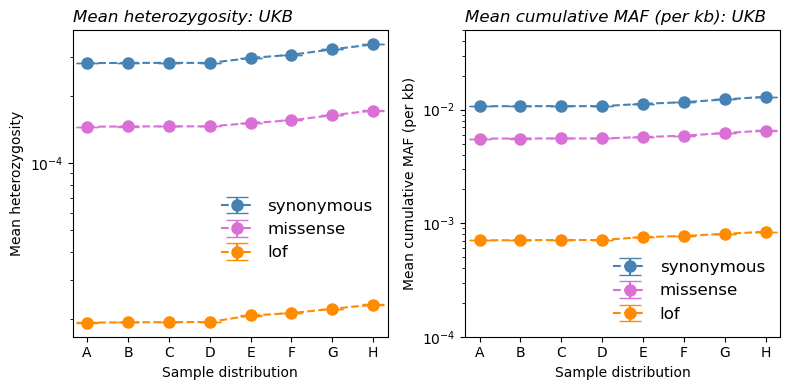

In [40]:
vartypes=['synonymous','missense','lof']

fig,ax = plt.subplots(1,2,figsize=(8,4))
w_list = np.logspace(1,4,40)

L = 1000
colors_s = ['steelblue','orchid','darkorange']
n = 100000
s_list = [0.001,0.01,0.1]
s_list_lab = [r"$s$=0.001","$s$=0.01","$s$=0.1"]
# lt=['-','dotted','-']

centers = ['centerE16N4','centerE9N9','centerE6N4']
centers_pca = ['centerX19Y4']

w_list = ['50000', '100000', '150000']
total_chromosomes=20000
for i,vt in enumerate(vartypes):
    for row in [0,1]:
        means = []
        errors = []
        for idx, w in enumerate(w_list + ['uniform']+w_list_pca+['uniformpca']):
            all_means = []
            all_errors = []
    
            if w in w_list+['uniform']:
                for center in centers:  # Loop through each center
                    sfs_file = f'../results/sfs/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.SIRsfs' if w != 'uniform' else f'../results/sfs/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs'
                    # print(sfs_file)
                    sfs = pd.read_csv(sfs_file, delimiter=' ')
                        
                    if row==1:
                        sfs = sfs[sfs['OBS_N'] > 0]
                        all_cmaf = []  
                        for rep in reps:  
                            rep_data = sfs[sfs['SIR_REP'] == rep]  
                            cmaf = calculate_cmaf(rep_data,scale=scale_factor)  # Calculate cumulative prob for the subset
                            all_cmaf.append(cmaf)  
                    
                        all_means.append(np.mean(all_cmaf))
                        all_errors.append(np.std(all_cmaf))
                    elif row == 0:
                        # Row 0: Average Heterozygosity (2p(1-p))
                        heterozygosity_contributions = []
                        for rep in reps:
                            contributions = sfs[(sfs['SIR_REP'] == rep)]
                            
                            # Calculate allele frequency p
                            p = contributions['OBS_N'] / n
                            
                            # Calculate heterozygosity 2p(1-p)
                            heterozygosity = 2 * p * (1 - p)
                            
                            # Weighted average of heterozygosity
                            weighted_heterozygosity = (heterozygosity * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                            heterozygosity_contributions.append(weighted_heterozygosity)
    
                        current_mean = np.mean(heterozygosity_contributions)
                        all_means.append(current_mean)
                        all_errors.append(np.std(heterozygosity_contributions))    

                # Average over all centers for this weight type
                means.append(np.mean(all_means))
                errors.append(np.sqrt(np.sum(np.array(all_errors) ** 2)) / len(all_errors))  # Combine standard errors
            else:
                sfs_file = f'../results/sfs/chr1_{vt}_{center_pca}pca{w}_nSIR10000_nSIRreps10.SIRsfs' if w != 'uniformpca' else f'../results/sfs/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.SIRsfs'
                sfs = pd.read_csv(sfs_file, delimiter=' ')
                
                if row==1:
                    sfs = sfs[sfs['OBS_N'] > 0]
                    all_cmaf = []  
                    for rep in reps:  
                        rep_data = sfs[sfs['SIR_REP'] == rep]  
                        cmaf = calculate_cmaf(rep_data,scale=scale_factor)  # Calculate cumulative prob for the subset
                        all_cmaf.append(cmaf)  
                
                    all_means.append(np.mean(all_cmaf))
                    all_errors.append(np.std(all_cmaf))
                elif row == 0:
                    # Row 0: Average Heterozygosity (2p(1-p))
                    heterozygosity_contributions = []
                    for rep in reps:
                        contributions = sfs[(sfs['SIR_REP'] == rep)]
                        
                        # Calculate allele frequency p
                        p = contributions['OBS_N'] / n
                        
                        # Calculate heterozygosity 2p(1-p)
                        heterozygosity = 2 * p * (1 - p)
                        
                        # Weighted average of heterozygosity
                        weighted_heterozygosity = (heterozygosity * contributions['COUNT_SITES']).sum() / contributions['COUNT_SITES'].sum()
                        heterozygosity_contributions.append(weighted_heterozygosity)

                    current_mean = np.mean(heterozygosity_contributions)
                    all_means.append(current_mean)
                    all_errors.append(np.std(heterozygosity_contributions))   

                 # Average over all centers for this weight type
                means.append(np.mean(all_means))
                errors.append(np.sqrt(np.sum(np.array(all_errors) ** 2)) / len(all_errors))  # Combine standard errors
        ax[row].errorbar(labels, means, yerr=errors, capsize=8, markersize=8, fmt='o',linestyle='--',color=colors_vt[i],label=vt)

ax[0].legend(frameon=False,loc='lower right', bbox_to_anchor=(1, 0.2))
ax[1].legend(frameon=False,loc='lower right')

ax[1].set_ylim(1e-4,5e-2)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_title('Mean heterozygosity: UKB',loc='left',fontstyle='italic')
ax[0].set_xlabel('Sample distribution')
ax[0].set_ylabel('Mean heterozygosity')

ax[1].set_title('Mean cumulative MAF (per kb): UKB',loc='left',fontstyle='italic')
ax[1].set_xlabel('Sample distribution')
ax[1].set_ylabel('Mean cumulative MAF (per kb)')
plt.tight_layout()
plt.savefig('cmaf_het_ukb.pdf')

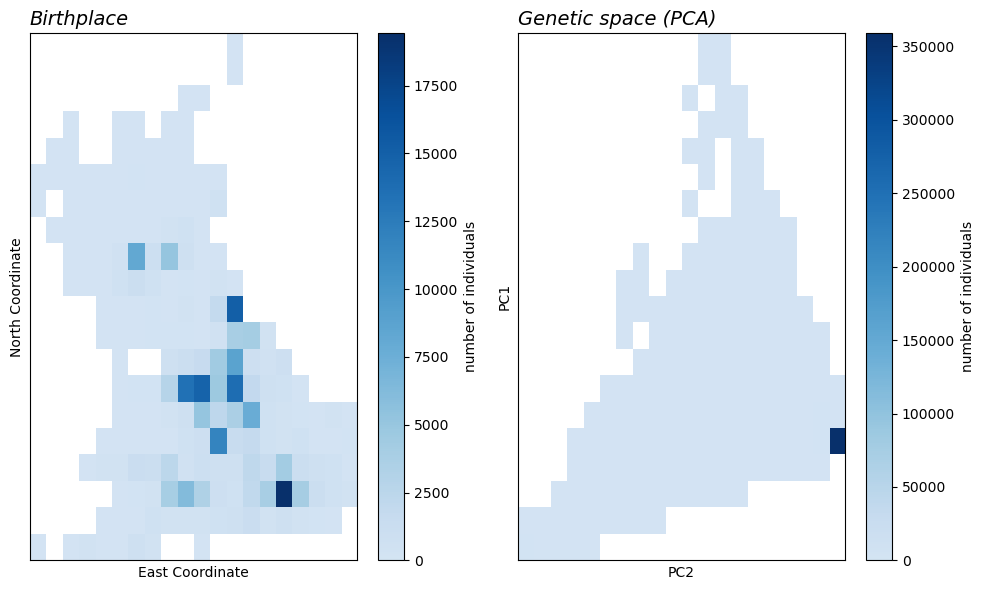

In [42]:
# function to map to bin
def map_to_bin(x,y,xedges,yedges):
    return [np.digitize(x,xedges)-1,np.digitize(y,yedges)-1]

# function to get bin center
def get_bin_center(bin_idx,xedges,yedges):
    x_idx, y_idx = bin_idx
    center_x = (xedges[x_idx] + xedges[x_idx + 1]) / 2
    center_y = (yedges[y_idx] + yedges[y_idx + 1]) / 2
    return [center_x, center_y]

df = pd.read_csv('../metadata/metadata_cleaned_wes.csv')
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere']!='Elsewhere') & (df['used_in_pca']==1) & (df['within_1epsilon_pca']==True)]
df_pca = df[(df['used_in_pca']==1)]

fig,ax = plt.subplots(1,2,figsize=(10,6))


x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')

im = ax[0].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[0])
ax[0].set_title('Birthplace',fontsize=14,fontstyle='italic',loc='left')
ax[0].set_ylabel('North Coordinate')
ax[0].set_xlabel('East Coordinate')


x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
im = ax[1].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[1])
ax[1].set_title('Genetic space (PCA)',fontsize=14,fontstyle='italic',loc='left')
ax[1].set_ylabel('PC1')
ax[1].set_xlabel('PC2')

for a in ax.flatten():
    a.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)

plt.tight_layout()
# plt.show()
plt.savefig('density_plots.pdf', dpi=1200, bbox_inches='tight')
